# Credit Card Fraud

## Intro 

The purpose of this project is to use machine learning (logistic regression) to predict whether a certain transaction is considered to be fraud or not. The dataset used is highly unbalanced as only 492 out of 284,807 transactions are classified as fraud. This dataset consists of 28 normalized features, along with Time and Amount. 

This notebook is run on the conda environment(Python 3.8.5).

The dataset is retrieved from https://www.kaggle.com/mlg-ulb/creditcardfraud


## Libraries Installation

The following Libraries below need to be installed. 

In [ ]:
conda install pandas

In [ ]:
conda install scikit-learn

In [ ]:
conda install numpy

In [ ]:
conda install matplotlib

In [ ]:
conda install seaborn

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Data Extraction

### Load DataFrame From File

In [18]:
dataset = pd.read_csv('creditcard.csv',delimiter=',',header='infer')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check dataset for null values

In [23]:
dataset.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Seperate Class column from dataset

In [28]:
labels= dataset[['Class']]
labels.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Drop `Time`, `Amount`, and `Class` Colmumns

Columns that are not normalized features are dropped and verify dataframe

In [33]:
features=dataset.drop(columns=['Time','Amount','Class'])
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


## Logistic Regression Model

Split `labels.Class` and `features` into training(70%) and test(30%) sets

* `x_train` - 70% of `features` dataset
* `x_test `   - 30% of `features` dataset
* `y_train` - 70% of `labels.Class` dataset
* `y_test `   - 30% of `labels.Class` dataset

In [36]:
x_train,x_test,y_train,y_test = train_test_split(features,labels.Class,test_size=0.30,shuffle=True)

### Train Logistic Regresion model with `x_train` and `y_train` dataset 

In [39]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Test Model with `x_test` dataset

In [42]:
pred=model.predict(x_test)

## Results

Create confusion matrix to compare results from model and actual values 

In [45]:
cnf_matrix = metrics.confusion_matrix(y_test,pred)
cnf_matrix

array([[85278,    17],
       [   44,   104]], dtype=int64)

### Visualize Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

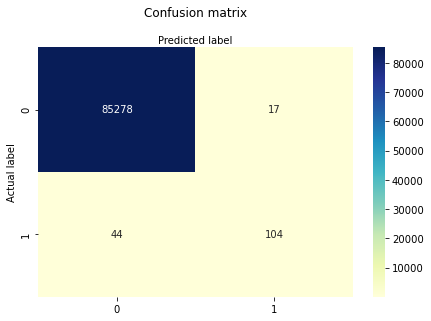

In [48]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Print report results

In [51]:
print(metrics.classification_report(y_test, pred, target_names=['Non-Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Non-Fraudulent       1.00      1.00      1.00     85295
    Fraudulent       0.86      0.70      0.77       148

      accuracy                           1.00     85443
     macro avg       0.93      0.85      0.89     85443
  weighted avg       1.00      1.00      1.00     85443

